In [61]:
import os

import matplotlib
import matplotlib.legend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

# Plot sizes
# Single plot: (6,4), tight_layout
# Double plot: (12,4), tight_layout

IMG_PATH = "/root/sae-transfer-learning/imgs/"
EVAL_PATH = "/root/sae-transfer-learning/eval/"
os.makedirs(IMG_PATH, exist_ok=True)

### Utils

In [62]:
def read_fwd_eval(ckpt: str) -> pd.DataFrame:
    fwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_forward_{ckpt}_all_mse.csv")
    fwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
    fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
    fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int) + 1
    fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    return fwd


def read_bwd_eval(ckpt: str) -> pd.DataFrame:
    bwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_backward_{ckpt}_all_mse.csv")
    bwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
    bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
    bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int) - 1
    bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    return bwd

### Baseline

In [3]:
baseline = pd.read_csv(EVAL_PATH + "rs-post_all.csv")
baseline.rename(columns={'Unnamed: 0':'L'}, inplace=True)
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated
0,0-0,NaN,NaN,3.482865,3.144242,14.061796,NaN,0.968984,8.929636,7.776788,0.874173,13.279309,9.375755,0.867050,9.814392e+00,1048576.0
1,0-1,NaN,NaN,4.365912,3.144242,14.061796,NaN,0.888100,8.929636,10.965591,1.212228,46.785007,16.852211,0.415671,4.008807e+01,1048576.0
2,0-2,NaN,NaN,4.917796,3.144242,14.061796,NaN,0.837550,8.929636,13.079082,1.419857,127.488533,33.032124,-0.385783,1.092567e+02,1048576.0
3,0-3,NaN,NaN,5.218734,3.144242,14.061796,NaN,0.809986,8.929636,13.367353,1.454492,201.001724,45.984840,-0.496373,1.103217e+02,1048576.0
4,0-4,NaN,NaN,5.143869,3.144242,14.061796,NaN,0.816843,8.929636,14.808439,1.621199,349.821564,71.548286,-1.013185,1.359372e+02,1048576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.323328,3.144242,10.115444,NaN,-0.173268,85.304214,987.095947,11.501805,4243.676758,13882.576172,-1432.204834,1.002238e+06,1048576.0
140,11-8,NaN,NaN,11.810724,3.144242,10.115444,NaN,-0.243183,85.304214,1268.971436,14.731133,4402.853027,14288.008789,-2455.928467,1.708611e+06,1048576.0
141,11-9,NaN,NaN,11.921373,3.144242,10.115444,NaN,-0.259056,85.304214,1439.946533,16.719614,4439.420410,13988.525391,-3174.965088,2.206613e+06,1048576.0
142,11-10,NaN,NaN,12.046246,3.144242,10.115444,NaN,-0.276968,85.304214,906.173950,10.482809,3542.750000,8021.020996,-1206.390381,8.434588e+05,1048576.0


In [4]:
baseline[["ACT-Layer", "SAE-Layer"]] = baseline["L"].str.split("-", n=1, expand=True)
baseline["ACT-Layer"] = baseline["ACT-Layer"].astype(int)
baseline["SAE-Layer"] = baseline["SAE-Layer"].astype(int)
baseline = baseline.sort_values(by=["ACT-Layer", "SAE-Layer"])
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.482865,3.144242,14.061796,NaN,0.968984,8.929636,7.776788,0.874173,13.279309,9.375755,0.867050,9.814392e+00,1048576.0,0,0
1,0-1,NaN,NaN,4.365912,3.144242,14.061796,NaN,0.888100,8.929636,10.965591,1.212228,46.785007,16.852211,0.415671,4.008807e+01,1048576.0,0,1
2,0-2,NaN,NaN,4.917796,3.144242,14.061796,NaN,0.837550,8.929636,13.079082,1.419857,127.488533,33.032124,-0.385783,1.092567e+02,1048576.0,0,2
3,0-3,NaN,NaN,5.218734,3.144242,14.061796,NaN,0.809986,8.929636,13.367353,1.454492,201.001724,45.984840,-0.496373,1.103217e+02,1048576.0,0,3
4,0-4,NaN,NaN,5.143869,3.144242,14.061796,NaN,0.816843,8.929636,14.808439,1.621199,349.821564,71.548286,-1.013185,1.359372e+02,1048576.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.323328,3.144242,10.115444,NaN,-0.173268,85.304214,987.095947,11.501805,4243.676758,13882.576172,-1432.204834,1.002238e+06,1048576.0,11,7
140,11-8,NaN,NaN,11.810724,3.144242,10.115444,NaN,-0.243183,85.304214,1268.971436,14.731133,4402.853027,14288.008789,-2455.928467,1.708611e+06,1048576.0,11,8
141,11-9,NaN,NaN,11.921373,3.144242,10.115444,NaN,-0.259056,85.304214,1439.946533,16.719614,4439.420410,13988.525391,-3174.965088,2.206613e+06,1048576.0,11,9
142,11-10,NaN,NaN,12.046246,3.144242,10.115444,NaN,-0.276968,85.304214,906.173950,10.482809,3542.750000,8021.020996,-1206.390381,8.434588e+05,1048576.0,11,10


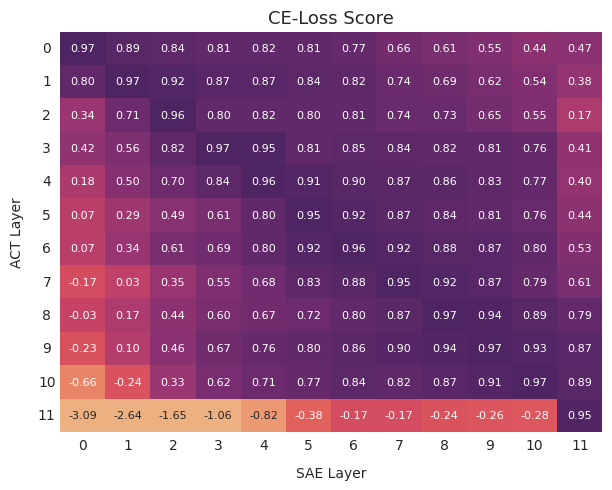

In [5]:
sns.set_context("paper")

# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2))
sns.set_theme()
ax = sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="flare",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10, rotation=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_ce_loss_score.png", dpi=300, bbox_inches="tight")
plt.show()

### Mapping

In [6]:
mapping = {"1": "100M", "2": "200M", "3": "300M", "4": "400M", "final": "500M"}
ckpt = mapping["final"]

In [7]:
mapping.values()

dict_values(['100M', '200M', '300M', '400M', '500M'])

### Forward

In [8]:
fwd = read_fwd_eval(ckpt)
fwd

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,1-0,NaN,NaN,3.534690,3.144242,14.784908,NaN,0.966458,11.420589,9.919613,0.868050,16.558167,12.074361,0.791214,19.557652,1048576.0,1,1
1,2-1,NaN,NaN,3.537874,3.144242,11.806273,NaN,0.954557,12.843464,10.959930,0.852766,29.126799,16.272152,0.763202,28.523918,1048576.0,2,2
2,3-2,NaN,NaN,3.616977,3.144242,16.689848,NaN,0.965101,13.956359,11.569058,0.824423,60.599728,24.621124,0.763703,35.163738,1048576.0,3,3
3,4-3,NaN,NaN,3.612109,3.144242,13.507900,NaN,0.954855,14.558751,12.158684,0.830277,70.733109,25.874289,0.758591,37.150795,1048576.0,4,4
4,5-4,NaN,NaN,3.613504,3.144242,12.770940,NaN,0.951254,17.770266,15.788086,0.883718,76.483765,27.291153,0.774620,38.080311,1048576.0,5,5
5,6-5,NaN,NaN,3.580001,3.144242,13.181763,NaN,0.956587,18.278492,16.070797,0.873423,91.237701,32.688782,0.811302,40.440544,1048576.0,6,6
6,7-6,NaN,NaN,3.588878,3.144242,12.486670,NaN,0.952407,22.708284,20.642347,0.904078,119.287941,39.801777,0.839424,45.453632,1048576.0,7,7
7,8-7,NaN,NaN,3.529232,3.144242,14.197948,NaN,0.965171,25.012251,22.843765,0.907829,141.462402,46.971001,0.850926,51.262074,1048576.0,8,8
8,9-8,NaN,NaN,3.486426,3.144242,12.990547,NaN,0.965248,24.915157,22.331663,0.890628,163.337418,54.392784,0.833830,61.910583,1048576.0,9,9
9,10-9,NaN,NaN,3.466222,3.144242,12.983049,NaN,0.967275,27.975559,25.096220,0.892579,201.782196,66.972176,0.831287,79.396744,1048576.0,10,10


In [9]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
plt.figure(figsize=(7, 5.2))
ax = sns.heatmap(
    fwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="flare",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Fwd CE-Loss Score - SAE$_{i \leftarrow i-1}$")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10, rotation=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.tight_layout()
plt.savefig(IMG_PATH + f"heatmap_fwd_ce_loss_score_{ckpt}.png", dpi=300, bbox_inches="tight")

ValueError: cannot reshape array of size 11 into shape (12,11)

<Figure size 700x520 with 0 Axes>

### Backward

In [10]:
bwd = read_bwd_eval(ckpt)
bwd

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-1,NaN,NaN,3.490626,3.144242,14.061796,NaN,0.968273,8.929636,7.763797,0.873189,15.267703,9.432337,0.865631,10.108912,1048576.0,0,0
1,1-2,NaN,NaN,3.504471,3.144242,14.784908,NaN,0.969054,11.420589,9.951750,0.871800,23.275894,12.567822,0.808897,18.537161,1048576.0,1,1
2,2-3,NaN,NaN,3.518602,3.144242,11.806273,NaN,0.956782,12.843464,10.953554,0.852891,40.914818,17.274281,0.775142,27.462719,1048576.0,2,2
3,3-4,NaN,NaN,3.608143,3.144242,16.689848,NaN,0.965753,13.956359,11.576160,0.825159,74.950172,25.227278,0.770942,34.251579,1048576.0,3,3
4,4-5,NaN,NaN,3.586239,3.144242,13.507900,NaN,0.957351,14.558751,12.154781,0.829976,76.073311,26.229538,0.760185,36.870193,1048576.0,4,4
5,5-6,NaN,NaN,3.592364,3.144242,12.770940,NaN,0.953450,17.770266,15.786786,0.883620,81.746635,27.517649,0.775200,37.929329,1048576.0,5,5
6,6-7,NaN,NaN,3.571838,3.144242,13.181763,NaN,0.957400,18.278492,16.064547,0.873114,103.642639,33.162849,0.812052,40.297783,1048576.0,6,6
7,7-8,NaN,NaN,3.575880,3.144242,12.486670,NaN,0.953798,22.708284,20.649078,0.904508,132.532898,40.365253,0.840068,45.226063,1048576.0,7,7
8,8-9,NaN,NaN,3.511103,3.144242,14.197948,NaN,0.966811,25.012251,22.829739,0.907152,144.358673,47.408230,0.851976,50.874485,1048576.0,8,8
9,9-10,NaN,NaN,3.471335,3.144242,12.990547,NaN,0.966780,24.915157,22.330677,0.890452,164.524139,54.778313,0.834531,61.599667,1048576.0,9,9


In [11]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
plt.figure(figsize=(7, 5.2))
ax = sns.heatmap(
    bwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="flare",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Bwd CE-Loss Score - SAE$_{i \leftarrow i+1}$")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10, rotation=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.tight_layout()
plt.savefig(IMG_PATH + f"heatmap_bwd_ce_loss_score_{ckpt}.png", dpi=300, bbox_inches="tight")

ValueError: cannot reshape array of size 11 into shape (12,11)

<Figure size 700x520 with 0 Axes>

In [12]:
# TODO:
# - Add one plot for checkpoint
# - Plot/Show-table for L0 and L1

### Baseline - fwd/bwd CE-Loss

In [13]:
fwd_baseline = lambda x: x[x["ACT-Layer"] - 1 == x["SAE-Layer"]]  # Forward baseline i on i+1
fwd_baseline(baseline)

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
12,1-0,NaN,NaN,5.467080,3.144242,14.784908,NaN,0.800455,11.420589,7.209377,0.603442,14.420720,10.075239,0.349084,310.597473,1048576.0,1,0
25,2-1,NaN,NaN,5.695486,3.144242,11.806273,NaN,0.705468,12.843464,8.366859,0.651739,19.308334,9.377380,0.428379,66.928970,1048576.0,2,1
38,3-2,NaN,NaN,5.532789,3.144242,16.689848,NaN,0.823666,13.956359,9.600672,0.682781,60.445084,20.871971,0.433252,88.574684,1048576.0,3,2
51,4-3,NaN,NaN,4.840975,3.144242,13.507900,NaN,0.836281,14.558751,9.831092,0.666585,60.999939,20.008690,0.480106,79.612411,1048576.0,4,3
64,5-4,NaN,NaN,5.036478,3.144242,12.770940,NaN,0.803439,17.770266,11.494127,0.621814,76.920479,24.990366,0.291084,130.243164,1048576.0,5,4
77,6-5,NaN,NaN,3.926455,3.144242,13.181763,NaN,0.922071,18.278492,16.816536,0.905790,158.981583,53.152645,0.497301,141.440552,1048576.0,6,5
90,7-6,NaN,NaN,4.260026,3.144242,12.486670,NaN,0.880568,22.708284,26.888662,1.118461,284.867065,110.841660,-0.009719,736.491882,1048576.0,7,6
103,8-7,NaN,NaN,4.613428,3.144242,14.197948,NaN,0.867087,25.012251,34.015636,1.277886,366.690308,155.906265,-0.787356,1821.080566,1048576.0,8,7
116,9-8,NaN,NaN,3.760916,3.144242,12.990547,NaN,0.937370,24.915157,29.970501,1.175985,386.846924,134.884933,0.005817,580.500244,1048576.0,9,8
129,10-9,NaN,NaN,3.989620,3.144242,12.983049,NaN,0.914077,27.975559,33.323502,1.173039,478.216187,171.352966,0.226365,370.711487,1048576.0,10,9


In [14]:
bwd_baseline = lambda x: x[x["ACT-Layer"] == x["SAE-Layer"] - 1]  # Backward baseline i on i-1
bwd_baseline(baseline)

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
1,0-1,NaN,NaN,4.365912,3.144242,14.061796,NaN,0.888100,8.929636,10.965591,1.212228,46.785007,16.852211,0.415671,40.088066,1048576.0,0,1
14,1-2,NaN,NaN,4.031696,3.144242,14.784908,NaN,0.923763,11.420589,11.071930,0.950396,55.030861,18.876228,0.535431,66.344170,1048576.0,1,2
27,2-3,NaN,NaN,4.895535,3.144242,11.806273,NaN,0.797820,12.843464,10.937921,0.827054,70.709297,25.710548,0.485837,139.926376,1048576.0,2,3
40,3-4,NaN,NaN,3.860449,3.144242,16.689848,NaN,0.947126,13.956359,12.440799,0.889734,118.310249,35.026138,0.598515,61.520611,1048576.0,3,4
53,4-5,NaN,NaN,4.065407,3.144242,13.507900,NaN,0.911116,14.558751,14.938290,1.021696,143.219223,42.275578,0.475413,94.244713,1048576.0,4,5
66,5-6,NaN,NaN,3.877817,3.144242,12.770940,NaN,0.923798,17.770266,18.732056,1.017820,170.996353,54.814701,0.510711,115.663589,1048576.0,5,6
79,6-7,NaN,NaN,3.992642,3.144242,13.181763,NaN,0.915477,18.278492,16.504955,0.888577,134.951187,42.221668,0.620943,105.814430,1048576.0,6,7
92,7-8,NaN,NaN,3.845359,3.144242,12.486670,NaN,0.924953,22.708284,25.948631,1.120190,242.472748,80.618561,0.614296,169.797638,1048576.0,7,8
105,8-9,NaN,NaN,3.785306,3.144242,14.197948,NaN,0.942005,25.012251,29.512737,1.153349,292.058685,96.947144,0.586992,210.001541,1048576.0,8,9
118,9-10,NaN,NaN,3.836581,3.144242,12.990547,NaN,0.929685,24.915157,27.341227,1.078806,340.289551,109.905052,0.591948,203.357346,1048576.0,9,10


In [15]:
base_baseline = lambda x: x[x["ACT-Layer"] == x["SAE-Layer"]]  # Baseline i on i
base_baseline(baseline)

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.482865,3.144242,14.061796,NaN,0.968984,8.929636,7.776788,0.874173,13.279309,9.375755,0.867050,9.814392,1048576.0,0,0
13,1-1,NaN,NaN,3.501060,3.144242,14.784908,NaN,0.969347,11.420589,9.975433,0.873614,20.848804,12.455654,0.809596,18.250074,1048576.0,1,1
26,2-2,NaN,NaN,3.511579,3.144242,11.806273,NaN,0.957592,12.843464,10.994510,0.855865,34.163376,16.790344,0.775905,27.216167,1048576.0,2,2
39,3-3,NaN,NaN,3.607227,3.144242,16.689848,NaN,0.965820,13.956359,11.598202,0.826719,71.383965,25.039062,0.772533,33.995163,1048576.0,3,3
52,4-4,NaN,NaN,3.593724,3.144242,13.507900,NaN,0.956629,14.558751,12.170871,0.831121,72.856476,26.105061,0.762064,36.607002,1048576.0,4,4
65,5-5,NaN,NaN,3.594135,3.144242,12.770940,NaN,0.953266,17.770266,15.795300,0.884012,78.221252,27.463245,0.776279,37.688515,1048576.0,5,5
78,6-6,NaN,NaN,3.574659,3.144242,13.181763,NaN,0.957119,18.278492,16.085260,0.874267,96.051498,32.817970,0.813217,40.039719,1048576.0,6,6
91,7-7,NaN,NaN,3.579819,3.144242,12.486670,NaN,0.953376,22.708284,20.646187,0.904246,129.008820,40.206615,0.841145,44.948540,1048576.0,7,7
104,8-8,NaN,NaN,3.520059,3.144242,14.197948,NaN,0.966001,25.012251,22.833241,0.907329,148.106140,47.496002,0.852500,50.703094,1048576.0,8,8
117,9-9,NaN,NaN,3.475012,3.144242,12.990547,NaN,0.966407,24.915157,22.334507,0.890593,161.049652,54.288631,0.835251,61.364254,1048576.0,9,9


### Normalized scores

##### Forward - All checkpoints

In [16]:
sns.set_context("paper")

# Automatic for every ckpt - forward
fwd_scores = {}
for ckpt in mapping.values():
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df = fwd_df.to_numpy()
    # (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
    scores = (fwd_df[:, 1] - fwd_df[:, 2]) / (fwd_df[:, 0] - fwd_df[:, 2])
    fwd_scores[ckpt.replace("final_", "")] = list(round(x, 3) for x in scores)

In [17]:
pd.DataFrame.from_dict(fwd_scores, orient="index", columns=np.arange(1, 12))

,1,2,3,4,5,6,7,8,9,10,11
100M,0.973,0.971,0.973,0.956,0.970,0.952,0.965,0.974,0.901,0.946,1.001
200M,0.977,0.979,0.985,0.970,0.977,0.967,0.974,0.982,0.930,0.965,1.003
300M,0.980,0.984,0.990,0.978,0.982,0.977,0.981,0.987,0.945,0.972,1.003
400M,0.981,0.986,0.993,0.982,0.985,0.982,0.985,0.990,0.955,0.979,1.003
500M,0.983,0.988,0.995,0.985,0.987,0.985,0.987,0.992,0.960,0.981,1.004


In [18]:
cels_fwd_dfs = []
for i, ckpt in enumerate(mapping.values()):
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df["Checkpoint"] = ckpt.replace("final_", "")
    cels_fwd_dfs.append(fwd_df)

/tmp/ipykernel_405032/4235920316.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_405032/4235920316.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_405032/4235920316.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_405032/4235920316.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_405032/4235920316.py:27: UserWarning: set_ticklabels(

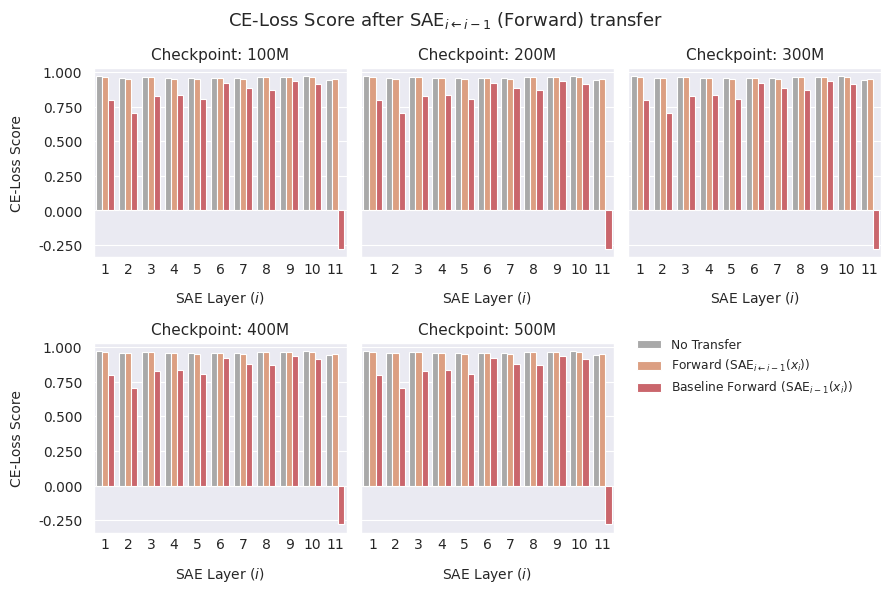

In [19]:
sns.set_context("paper")
colors = sns.color_palette("flare", 10)
fig, axes = plt.subplots(2, 3, figsize=(9, 6), sharex=False, sharey=True)

# Automatic for every ckpt single plot - backward
for i, ckpt in enumerate(mapping.values()):
    df = cels_fwd_dfs[i]

    # Reset index to use for plotting
    df = df.reset_index().melt(id_vars=["index", "Checkpoint"], var_name="Metric", value_name="SAE")

    # Plotting using Seaborn
    ax = axes[i // 3, i % 3]
    ax.set_title("Checkpoint: " + ckpt.replace("final_", "")[0] + "00M")
    sns.barplot(
        data=df,
        x="index",
        y="SAE",
        hue="Metric",
        ax=ax,
        legend="full" if i == 4 else False,
        palette={"No Transfer": "darkgrey", "Forward": colors[0], "Baseline Forward": colors[3]},
    )
    if i == 4:
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
    ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
    ax.set_xlabel("SAE Layer ($i$)")
    ax.set_ylabel("CE-Loss Score")
    ax.title.set_fontsize(11)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
fig.suptitle("CE-Loss Score after SAE$_{i\leftarrow i-1}$ (Forward) transfer", fontsize=13)
fig.legend(
    handles,
    ["No Transfer", "Forward (SAE$_{i\leftarrow i-1}(x_i)$)", "Baseline Forward (SAE$_{i-1}(x_{i})$)"],
    loc="upper left",
    bbox_to_anchor=(0.7, 0.45),
    ncol=1,
    title=None,
    frameon=False,
)
fig.delaxes(axes[1, 2])
plt.tight_layout()
# plt.savefig(IMG_PATH + f"barplot_ce_loss_score_fwd_all.png", dpi=300, bbox_inches="tight")

In [20]:
remove_baseline = True
if remove_baseline:
    cels_fwd_dfs_plot = (
        pd.concat(cels_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["Checkpoint", "i"], var_name="type", value_name="cels")
    )
    cels_fwd_dfs_plot = cels_fwd_dfs_plot[cels_fwd_dfs_plot["type"] != "Baseline Forward"]
else:
    cels_fwd_dfs_plot = (
        pd.concat(cels_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["Checkpoint", "i"], var_name="type", value_name="cels")
    )
cels_fwd_dfs_plot["i"] = cels_fwd_dfs_plot["i"] + 1
cels_fwd_dfs_plot.head()

,Checkpoint,i,type,cels
0,100M,1,No Transfer,0.969347
1,100M,2,No Transfer,0.957592
2,100M,3,No Transfer,0.965820
3,100M,4,No Transfer,0.956629
4,100M,5,No Transfer,0.953266


/tmp/ipykernel_405032/2644086032.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2644086032.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2644086032.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2644086032.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

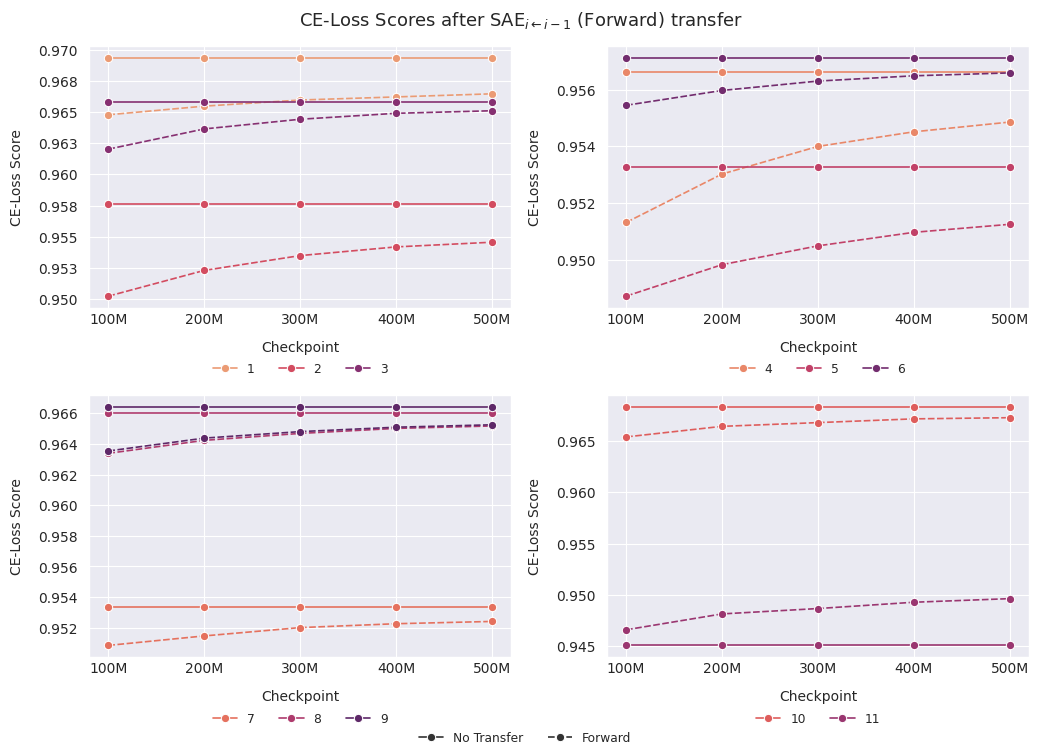

In [21]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=cels_fwd_dfs_plot[cels_fwd_dfs_plot["i"].isin(layers)],
        x="Checkpoint",
        y="cels",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend().remove()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("CE-Loss Score")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("CE-Loss Scores after SAE$_{i\leftarrow i-1}$ (Forward) transfer", fontsize=13)
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_cels_fwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_cels_fwd_small_all.png", dpi=300, bbox_inches="tight")

In [22]:
# Avgs per checkpoint
columns = [col for col in cels_fwd_dfs[0].columns if "checkpoint" not in col.lower()]

ce_fwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): cels_fwd_dfs[i][columns].mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
ce_fwd_avgs_df.columns = columns
ce_fwd_avgs_df_plot = ce_fwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. CE-Loss Score"
)
ce_fwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. CE-Loss Score
0,100M,No Transfer,0.959903
1,200M,No Transfer,0.959903
2,300M,No Transfer,0.959903
3,400M,No Transfer,0.959903
4,500M,No Transfer,0.959903


##### Backward - All checkpoints

In [23]:
sns.set_context("paper")

# Automatic for every ckpt - backward
bwd_scores = {}
for ckpt in mapping.values():
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df = bwd_df.to_numpy()
    # (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
    scores = (bwd_df[:, 1] - bwd_df[:, 2]) / (bwd_df[:, 0] - bwd_df[:, 2])
    bwd_scores[ckpt.replace("final_", "")] = list(round(x, 3) for x in scores)

In [24]:
pd.DataFrame.from_dict(bwd_scores, orient="index", columns=np.arange(0, 11))

,0,1,2,3,4,5,6,7,8,9,10
100M,0.980,0.973,0.980,0.954,1.003,0.970,0.993,1.002,1.044,1.014,0.937
200M,0.983,0.982,0.987,0.976,1.009,0.983,0.997,1.006,1.035,1.012,0.951
300M,0.986,0.988,0.991,0.984,1.014,0.993,1.001,1.011,1.034,1.010,0.964
400M,0.989,0.992,0.994,0.993,1.014,0.999,1.004,1.011,1.033,1.009,0.971
500M,0.991,0.994,0.995,0.996,1.016,1.006,1.007,1.015,1.034,1.010,0.975


In [25]:
cels_bwd_dfs = []
for i, ckpt in enumerate(mapping.values()):
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df["Checkpoint"] = ckpt.replace("final_", "")
    cels_bwd_dfs.append(bwd_df)

In [26]:
remove_baseline = True

if remove_baseline:
    cels_bwd_dfs_plot = (
        pd.concat(cels_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["Checkpoint", "i"], var_name="type", value_name="cels")
    )
    cels_bwd_dfs_plot = cels_bwd_dfs_plot[cels_bwd_dfs_plot["type"] != "Baseline Backward"]
else:
    cels_bwd_dfs_plot = (
        pd.concat(cels_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["Checkpoint", "i"], var_name="type", value_name="cels")
    )
cels_bwd_dfs_plot.head()

,Checkpoint,i,type,cels
0,100M,0,No Transfer,0.968984
1,100M,1,No Transfer,0.969347
2,100M,2,No Transfer,0.957592
3,100M,3,No Transfer,0.965820
4,100M,4,No Transfer,0.956629


/tmp/ipykernel_405032/3927048214.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/3927048214.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/3927048214.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/3927048214.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

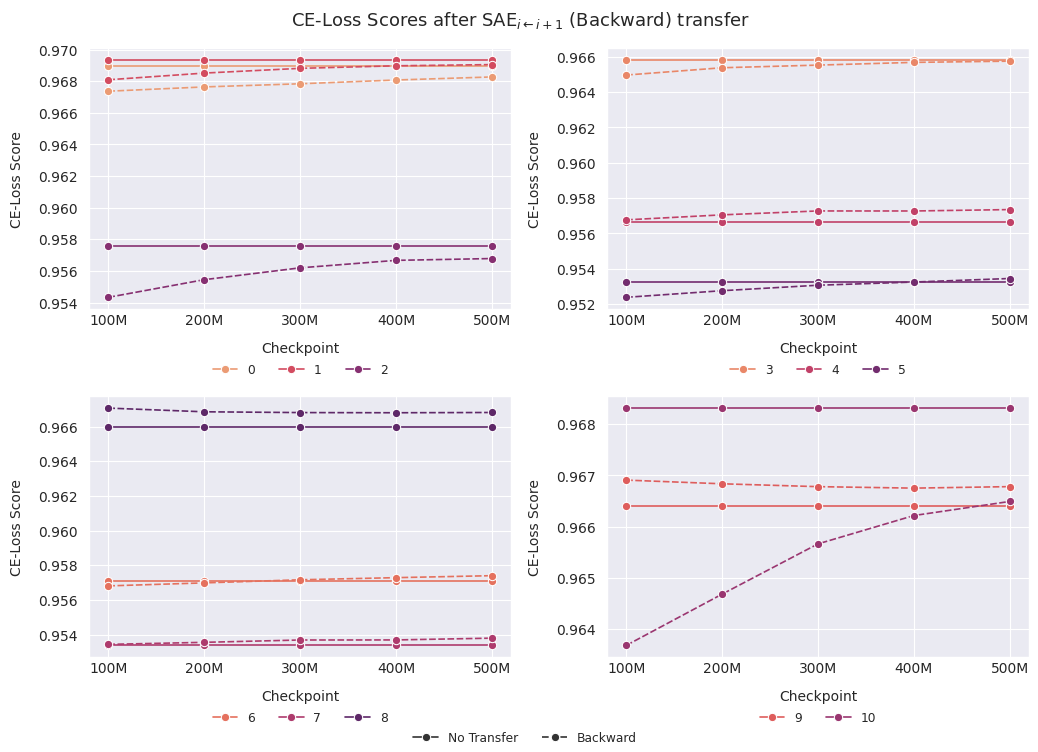

In [27]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=cels_bwd_dfs_plot[cels_bwd_dfs_plot["i"].isin(layers)],
        x="Checkpoint",
        y="cels",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("CE-Loss Score")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("CE-Loss Scores after SAE$_{i\leftarrow i+1}$ (Backward) transfer", fontsize=13)
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_cels_bwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_cels_bwd_small_all.png", dpi=300, bbox_inches="tight")

In [28]:
# Avgs per checkpoint
columns = [col for col in cels_bwd_dfs[0].columns if "checkpoint" not in col.lower()]

ce_bwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): cels_bwd_dfs[i][columns].mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
ce_bwd_avgs_df.columns = columns
ce_bwd_avgs_df_plot = ce_bwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. CE-Loss Score"
)
ce_bwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. CE-Loss Score
0,100M,No Transfer,0.962078
1,200M,No Transfer,0.962078
2,300M,No Transfer,0.962078
3,400M,No Transfer,0.962078
4,500M,No Transfer,0.962078


##### Combined

In [29]:
ce_combined_avgs_df = pd.concat([ce_fwd_avgs_df, ce_bwd_avgs_df], axis=1)
ce_combined_avgs_df.drop(
    columns=[col for col in ce_combined_avgs_df.columns if "No Transfer" in col or "Baseline" in col], inplace=True
)
ce_combined_avgs_df_plot = ce_combined_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. CE-Loss Score"
)
ce_combined_avgs_df_plot.head()

,Checkpoint,Type,Avg. CE-Loss Score
0,100M,Forward,0.956569
1,200M,Forward,0.957715
2,300M,Forward,0.958327
3,400M,Forward,0.958731
4,500M,Forward,0.958958


In [30]:
baseline_avg_ce_loss = (
    baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]].reset_index(drop=True)[["ce_loss_score"]].mean().item()
)
baseline_avg_ce_loss

0.9606597160960502

/tmp/ipykernel_405032/2309566304.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


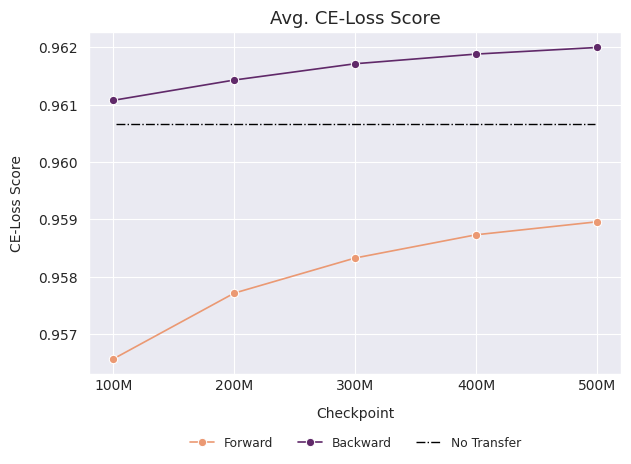

In [31]:
bounds = "mean"
colors = sns.color_palette("flare", n_colors=10)

sns.set_theme("paper")
ax = sns.lineplot(
    data=ce_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. CE-Loss Score",
    hue="Type",
    marker="o",
    palette={"Forward": colors[0], "Backward": colors[-1]},
    markersize=6,
)
handles, labels = ax.get_legend_handles_labels()
if "mean" in bounds:
    labels.append("No Transfer")
    handles.append(plt.axhline(y=baseline_avg_ce_loss, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="-."))
ax.set_title("Avg. CE-Loss Score")
ax.set_ylabel("CE-Loss Score")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
plt.legend(handles=handles, labels=labels)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.25), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.savefig(IMG_PATH + f"avg_ce_loss_score_through_time_combined_bounds_{bounds}.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_405032/3931969173.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_405032/3931969173.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")


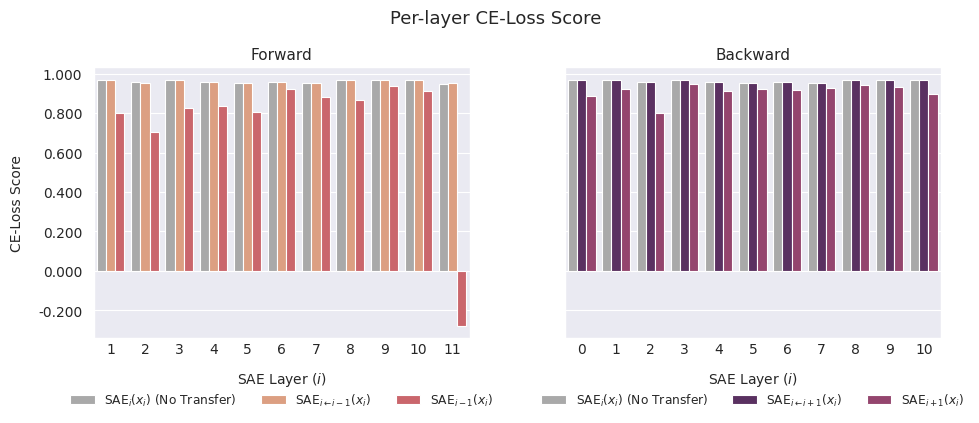

In [32]:
sns.set_context("paper")
colors = sns.color_palette("flare", 10)
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharex=False, sharey=True)

# Forward barplot
df = cels_fwd_dfs[-1]
df = df.reset_index().melt(id_vars=["index", "Checkpoint"], var_name="Metric", value_name="SAE")
ax = axes[0]
sns.barplot(
    data=df,
    x="index",
    y="SAE",
    hue="Metric",
    ax=ax,
    legend="full",
    palette={"No Transfer": "darkgrey", "Forward": colors[0], "Baseline Forward": colors[3]},
)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(handles, ["SAE$_i(x_i)$ (No Transfer)", "SAE$_{i \leftarrow i-1}(x_i)$", "SAE$_{i-1}(x_i)$"], frameon=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, title=None, frameon=False)
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_xlabel("SAE Layer ($i$)")
ax.set_ylabel("CE-Loss Score")
ax.set_title("Forward")
ax.title.set_fontsize(11)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))

# Backward barplot
df = cels_bwd_dfs[-1]
df = df.reset_index().melt(id_vars=["index", "Checkpoint"], var_name="Metric", value_name="SAE")
ax = axes[1]
sns.barplot(
    data=df,
    x="index",
    y="SAE",
    hue="Metric",
    ax=ax,
    legend="full",
    palette={"No Transfer": "darkgrey", "Backward": colors[-1], "Baseline Backward": colors[-4]},
)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(handles, ["SAE$_i(x_i)$ (No Transfer)", "SAE$_{i \leftarrow i+1}(x_i)$", "SAE$_{i+1}(x_i)$"], frameon=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, title=None, frameon=False)
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_xlabel("SAE Layer ($i$)")
ax.set_ylabel("CE-Loss Score")
ax.set_title("Backward")
ax.title.set_fontsize(11)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
fig.suptitle("Per-layer CE-Loss Score", fontsize=13)
plt.tight_layout()
plt.savefig(IMG_PATH + f"barplot_ce_loss_score_fwd_bwd_last_ckpt.png", dpi=300, bbox_inches="tight")

### L0 plots - bwd

In [33]:
# Automatic for every ckpt - backward
l0_bwd_dfs = []
for ckpt in mapping.values():
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df["checkpoint"] = ckpt.replace("final_", "")
    l0_bwd_dfs.append(bwd_df)

In [34]:
remove_baseline = True

if remove_baseline:
    l0_bwd_dfs_plot = (
        pd.concat(l0_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
    l0_bwd_dfs_plot = l0_bwd_dfs_plot[l0_bwd_dfs_plot["type"] != "Baseline Backward"]
else:
    l0_bwd_dfs_plot = (
        pd.concat(l0_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
l0_bwd_dfs_plot.head()

,checkpoint,i,type,l0
0,100M,0,No Transfer,13.279309
1,100M,1,No Transfer,20.848804
2,100M,2,No Transfer,34.163376
3,100M,3,No Transfer,71.383965
4,100M,4,No Transfer,72.856476


/tmp/ipykernel_405032/215714343.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/215714343.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/215714343.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/215714343.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va

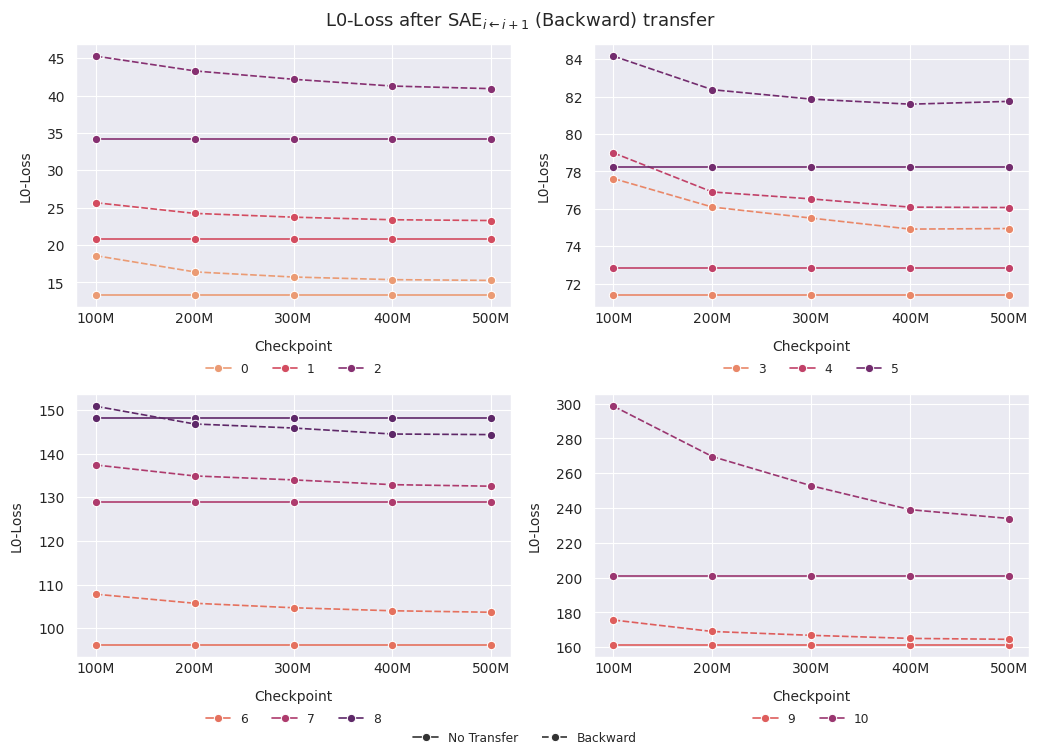

In [35]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=l0_bwd_dfs_plot[l0_bwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L0-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L0-Loss after SAE$_{i\leftarrow i+1}$ (Backward) transfer", fontsize=13)
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_l0_bwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_l0_bwd_small_all.png", dpi=300, bbox_inches="tight")

In [36]:
# Avgs per checkpoint
l0_bwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): l0_bwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
l0_bwd_avgs_df.columns = l0_bwd_dfs[0].columns[:-1]
l0_bwd_avgs_df_plot = l0_bwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. L0-Loss"
)
l0_bwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. L0-Loss
0,100M,No Transfer,93.247663
1,200M,No Transfer,93.247663
2,300M,No Transfer,93.247663
3,400M,No Transfer,93.247663
4,500M,No Transfer,93.247663


In [37]:
l0_bwd_avgs_df.head()

,No Transfer,Backward,Baseline Backward
100M,93.247663,109.130814,210.254781
200M,93.247663,104.113256,210.254781
300M,93.247663,101.785498,210.254781
400M,93.247663,99.824158,210.254781
500M,93.247663,99.204231,210.254781


### L0 plots - fwd

In [38]:
# Automatic for every ckpt - backward
l0_fwd_dfs = []
for ckpt in mapping.values():
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df["checkpoint"] = ckpt.replace("final_", "")
    l0_fwd_dfs.append(fwd_df)

In [39]:
remove_baseline = True

if remove_baseline:
    l0_fwd_dfs_plot = (
        pd.concat(l0_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
    l0_fwd_dfs_plot = l0_fwd_dfs_plot[l0_fwd_dfs_plot["type"] != "Baseline Forward"]
else:
    l0_fwd_dfs_plot = (
        pd.concat(l0_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
    )
l0_fwd_dfs_plot["i"] = l0_fwd_dfs_plot["i"] + 1
l0_fwd_dfs_plot.head()

,checkpoint,i,type,l0
0,100M,1,No Transfer,20.848804
1,100M,2,No Transfer,34.163376
2,100M,3,No Transfer,71.383965
3,100M,4,No Transfer,72.856476
4,100M,5,No Transfer,78.221252


/tmp/ipykernel_405032/2699603573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2699603573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2699603573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2699603573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

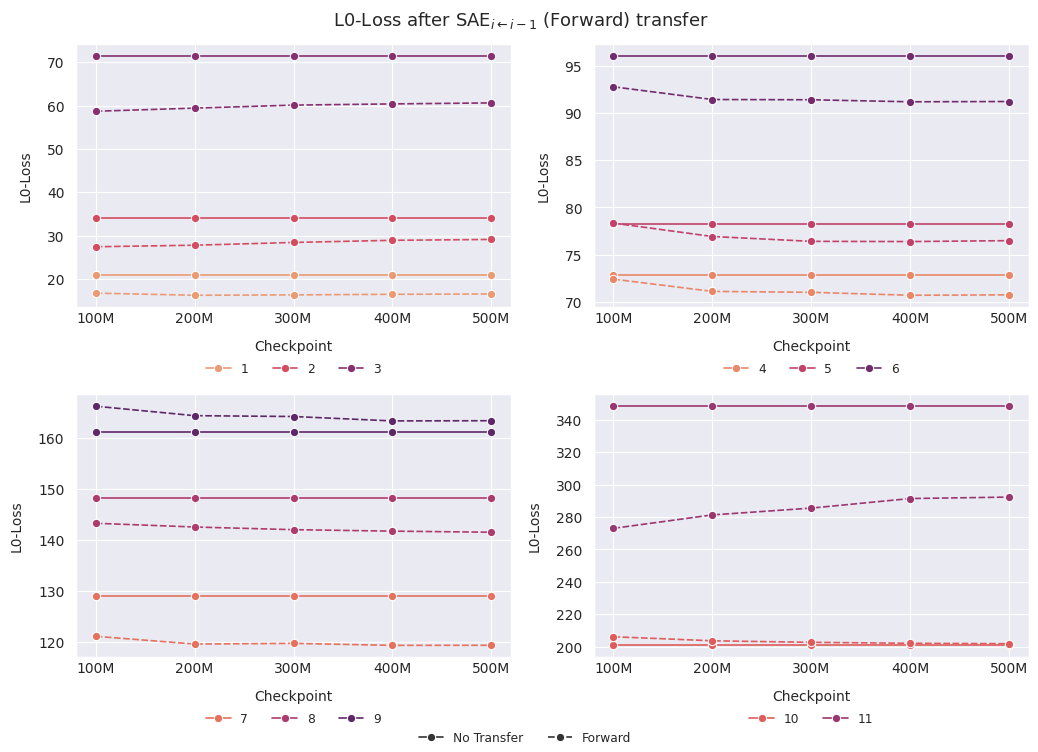

In [40]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=l0_fwd_dfs_plot[l0_fwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L0-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L0-Loss after SAE$_{i\leftarrow i-1}$ (Forward) transfer", fontsize=13)
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_fwd_l0_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + "lineplot_fwd_l0_small_all.png", dpi=300, bbox_inches="tight")

In [41]:
# Avgs per checkpoint
l0_fwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): l0_fwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
l0_fwd_avgs_df.columns = l0_fwd_dfs[0].columns[:-1]
l0_fwd_avgs_df_plot = l0_fwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. L0-Loss"
)
l0_fwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. L0-Loss
0,100M,No Transfer,123.71356
1,200M,No Transfer,123.71356
2,300M,No Transfer,123.71356
3,400M,No Transfer,123.71356
4,500M,No Transfer,123.71356


In [42]:
l0_combined_avgs_df = pd.concat([l0_fwd_avgs_df, l0_bwd_avgs_df], axis=1)
l0_combined_avgs_df.drop(
    columns=[col for col in l0_combined_avgs_df.columns if "No Transfer" in col or "Baseline" in col], inplace=True
)
l0_combined_avgs_df_plot = l0_combined_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. L0-Loss"
)
l0_combined_avgs_df_plot.head()

,Checkpoint,Type,Avg. L0-Loss
0,100M,Forward,114.176642
1,200M,Forward,114.014893
2,300M,Forward,114.331380
3,400M,Forward,114.704532
4,500M,Forward,114.810636


In [43]:
baseline_avg_l0 = (
    baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]].reset_index(drop=True)[["l0"]].mean().item()
)
baseline_avg_l0

114.51070602734883

/tmp/ipykernel_405032/768347662.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


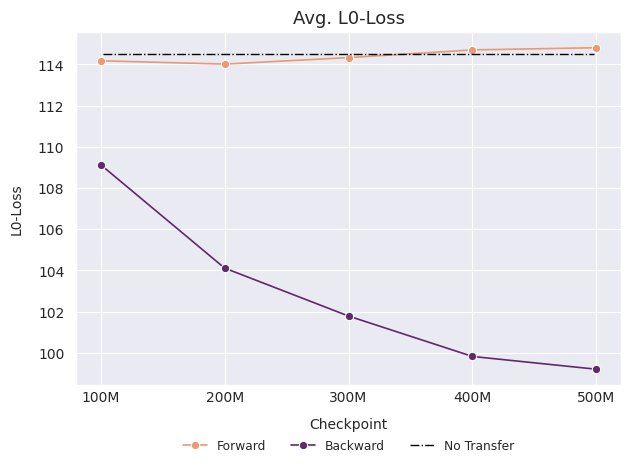

In [44]:
bounds = "mean"
colors = sns.color_palette("flare", n_colors=10)

sns.set_theme("paper")
ax = sns.lineplot(
    data=l0_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. L0-Loss",
    hue="Type",
    marker="o",
    palette={"Forward": colors[0], "Backward": colors[-1]},
    markersize=6,
)
handles, labels = ax.get_legend_handles_labels()
if "mean" in bounds:
    labels.append("No Transfer")
    handles.append(plt.axhline(y=baseline_avg_l0, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="-."))
ax.set_title("Avg. L0-Loss")
ax.set_ylabel("L0-Loss")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.legend(handles=handles, labels=labels)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.22), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.savefig(IMG_PATH + f"avg_l0_loss_score_through_time_combined_bound_{bounds}.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_405032/3565247983.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_405032/3565247983.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")


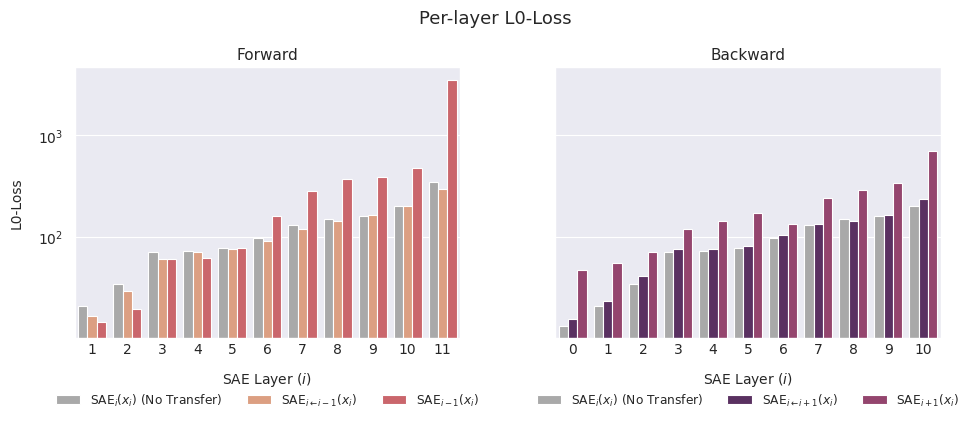

In [45]:
sns.set_context("paper")
colors = sns.color_palette("flare", 10)
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharex=False, sharey=True)

# Forward barplot
df = l0_fwd_dfs[-1]
df = df.reset_index().melt(id_vars=["index", "checkpoint"], var_name="Metric", value_name="SAE")
ax = axes[0]
sns.barplot(
    data=df,
    x="index",
    y="SAE",
    hue="Metric",
    ax=ax,
    legend="full",
    palette={"No Transfer": "darkgrey", "Forward": colors[0], "Baseline Forward": colors[3]},
)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(handles, ["SAE$_i(x_i)$ (No Transfer)", "SAE$_{i \leftarrow i-1}(x_i)$", "SAE$_{i-1}(x_i)$"], frameon=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, title=None, frameon=False)
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_xlabel("SAE Layer ($i$)")
ax.set_ylabel("L0-Loss")
ax.set_title("Forward")
ax.title.set_fontsize(11)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_yscale("log")

# Backward barplot
df = l0_bwd_dfs[-1]
df = df.reset_index().melt(id_vars=["index", "checkpoint"], var_name="Metric", value_name="SAE")
ax = axes[1]
sns.barplot(
    data=df,
    x="index",
    y="SAE",
    hue="Metric",
    ax=ax,
    legend="full",
    palette={"No Transfer": "darkgrey", "Backward": colors[-1], "Baseline Backward": colors[-4]},
)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(handles, ["SAE$_i(x_i)$ (No Transfer)", "SAE$_{i \leftarrow i+1}(x_i)$", "SAE$_{i+1}(x_i)$"], frameon=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, title=None, frameon=False)
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_xlabel("SAE Layer ($i$)")
ax.set_ylabel("L0-Loss")
ax.set_title("Backward")
ax.title.set_fontsize(11)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_yscale("log")

fig.suptitle("Per-layer L0-Loss", fontsize=13)
plt.tight_layout()
plt.savefig(IMG_PATH + f"barplot_l0_fwd_bwd_last_ckpt.png", dpi=300, bbox_inches="tight")

### MSE plots - bwd

In [46]:
# Automatic for every ckpt - backward
mse_bwd_dfs = []
for ckpt in mapping.values():
    bwd = read_bwd_eval(ckpt)
    bwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[:-1]
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "No Transfer"}),
            base_baseline(bwd)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Backward"}),
            bwd_baseline(baseline)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Baseline Backward"}),
        ],
        axis=1,
    )
    bwd_df["checkpoint"] = ckpt.replace("final_", "")
    mse_bwd_dfs.append(bwd_df)

In [47]:
remove_baseline = True

if remove_baseline:
    mse_bwd_dfs_plot = (
        pd.concat(mse_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
    mse_bwd_dfs_plot = mse_bwd_dfs_plot[mse_bwd_dfs_plot["type"] != "Baseline Backward"]
else:
    mse_bwd_dfs_plot = (
        pd.concat(mse_bwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
mse_bwd_dfs_plot.head()

,checkpoint,i,type,mse
0,100M,0,No Transfer,9.814392
1,100M,1,No Transfer,18.250074
2,100M,2,No Transfer,27.216167
3,100M,3,No Transfer,33.995163
4,100M,4,No Transfer,36.607002


/tmp/ipykernel_405032/1757840357.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/1757840357.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/1757840357.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/1757840357.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

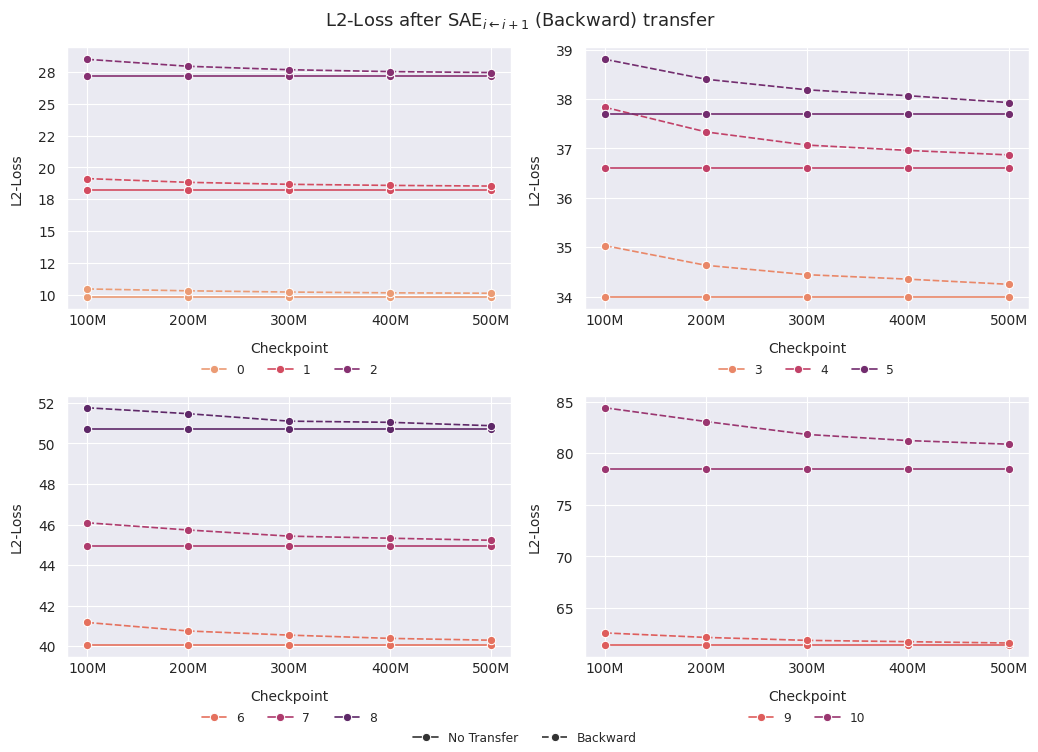

In [48]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=mse_bwd_dfs_plot[mse_bwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="mse",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L2-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L2-Loss after SAE$_{i\leftarrow i+1}$ (Backward) transfer", fontsize=13)
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_mse_bwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + "lineplot_mse_bwd_small_all.png", dpi=300, bbox_inches="tight")

### MSE plots - fwd

In [49]:
# Automatic for every ckpt - forward
mse_fwd_dfs = []
for ckpt in mapping.values():
    fwd = read_fwd_eval(ckpt)
    fwd_df = pd.concat(
        [
            base_baseline(baseline)
            .iloc[1:]
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "No Transfer"}),
            base_baseline(fwd)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Forward"}),
            fwd_baseline(baseline)
            .reset_index(drop=True)[["mse"]]
            .rename(columns={"mse": "Baseline Forward"}),
        ],
        axis=1,
    )
    fwd_df["checkpoint"] = ckpt.replace("final_", "")
    mse_fwd_dfs.append(fwd_df)

In [50]:
mse_fwd_dfs[-1]

,No Transfer,Forward,Baseline Forward,checkpoint
0,18.250074,19.557652,310.597473,500M
1,27.216167,28.523918,66.928970,500M
2,33.995163,35.163738,88.574684,500M
3,36.607002,37.150795,79.612411,500M
4,37.688515,38.080311,130.243164,500M
5,40.039719,40.440544,141.440552,500M
6,44.948540,45.453632,736.491882,500M
7,50.703094,51.262074,1821.080566,500M
8,61.364254,61.910583,580.500244,500M
9,78.511063,79.396744,370.711487,500M


In [51]:
remove_baseline = True

if remove_baseline:
    mse_fwd_dfs_plot = (
        pd.concat(mse_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
    mse_fwd_dfs_plot = mse_fwd_dfs_plot[mse_fwd_dfs_plot["type"] != "Baseline Forward"]
else:
    mse_fwd_dfs_plot = (
        pd.concat(mse_fwd_dfs, axis=0)
        .reset_index(names="i")
        .melt(id_vars=["checkpoint", "i"], var_name="type", value_name="mse")
    )
mse_fwd_dfs_plot["i"] = mse_fwd_dfs_plot["i"] + 1
mse_fwd_dfs_plot.head()

,checkpoint,i,type,mse
0,100M,1,No Transfer,18.250074
1,100M,2,No Transfer,27.216167
2,100M,3,No Transfer,33.995163
3,100M,4,No Transfer,36.607002
4,100M,5,No Transfer,37.688515


/tmp/ipykernel_405032/2602901849.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2602901849.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2602901849.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_405032/2602901849.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"]

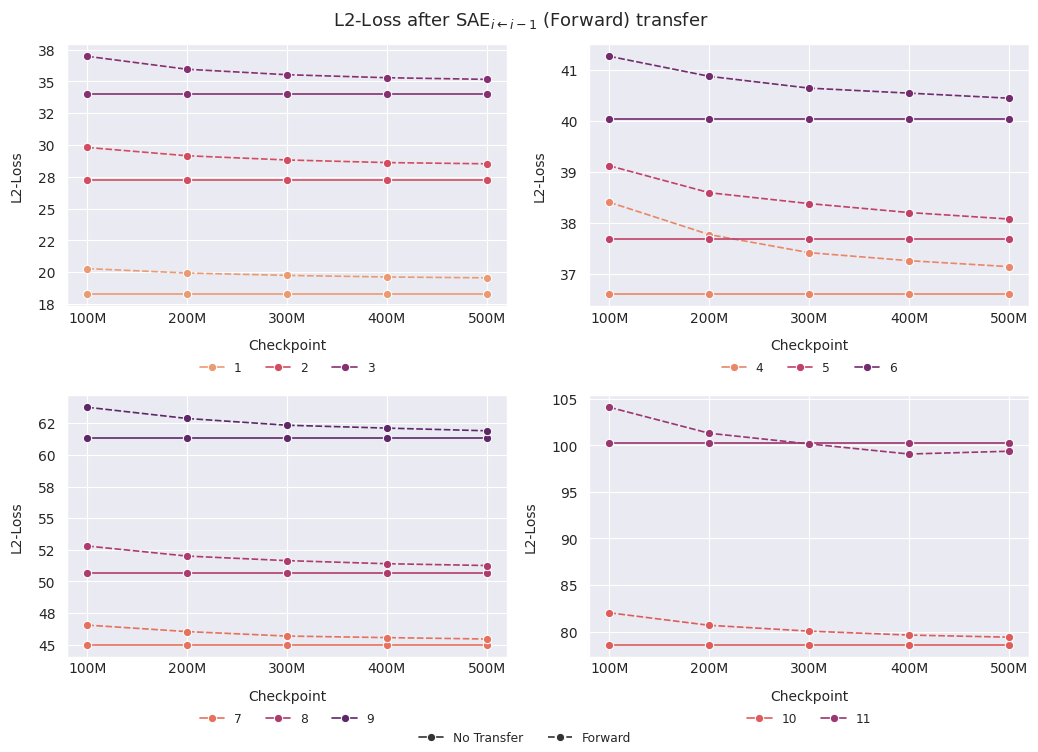

In [52]:
sns.set_context("paper")
colors = sns.color_palette("flare", n_colors=11, as_cmap=False)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.5), sharex=False, sharey=False)
for i, layers in enumerate([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]):
    ax = axes[i // 2, i % 2]
    sns.lineplot(
        data=mse_fwd_dfs_plot[mse_fwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="mse",
        hue="i",
        style="type",
        err_style="bars",
        legend="full",
        palette=colors[i:12:4],
        ax=ax,
        marker="o",
        markersize=6,
    )
    h, l = ax.get_legend_handles_labels()
    ax.legend(h[1 : 4 - int(i == 3)], l[1 : 4 - int(i == 3)])
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=4, title=None, frameon=False)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L2-Loss")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h[-3 + int(remove_baseline) :],
        l[-3 + int(remove_baseline) :],
        loc="lower center",
        bbox_to_anchor=(0.5, -0.005),
        ncol=3,
        title=None,
        frameon=False,
    )
)
plt.suptitle("L2-Loss after SAE$_{i\leftarrow i-1}$ (Forward) transfer", fontsize=13)
plt.tight_layout()
if remove_baseline:
    plt.savefig(IMG_PATH + f"lineplot_mse_fwd_small_all_no_lower_baseline.png", dpi=300, bbox_inches="tight")
else:
    plt.savefig(IMG_PATH + f"lineplot_mse_fwd_small_all.png", dpi=300, bbox_inches="tight")

In [53]:
# Avgs per checkpoint
mse_bwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): mse_bwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
mse_bwd_avgs_df.columns = mse_bwd_dfs[0].columns[:-1]
mse_bwd_avgs_df_plot = mse_bwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. MSE-Loss"
)
mse_bwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. MSE-Loss
0,100M,No Transfer,39.921635
1,200M,No Transfer,39.921635
2,300M,No Transfer,39.921635
3,400M,No Transfer,39.921635
4,500M,No Transfer,39.921635


In [54]:
# Avgs per checkpoint
mse_fwd_avgs_df = pd.DataFrame.from_dict(
    {
        ckpt.replace("final_", ""): mse_fwd_dfs[i].drop(columns=["checkpoint"]).mean(axis=0).tolist()
        for i, ckpt in enumerate(mapping.values())
    },
    orient="index",
)
mse_fwd_avgs_df.columns = mse_fwd_dfs[0].columns[:-1]
mse_fwd_avgs_df_plot = mse_fwd_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. MSE-Loss"
)
mse_fwd_avgs_df_plot.head()

,Checkpoint,Type,Avg. MSE-Loss
0,100M,No Transfer,48.147733
1,200M,No Transfer,48.147733
2,300M,No Transfer,48.147733
3,400M,No Transfer,48.147733
4,500M,No Transfer,48.147733


/tmp/ipykernel_405032/4274839350.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_405032/4274839350.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")


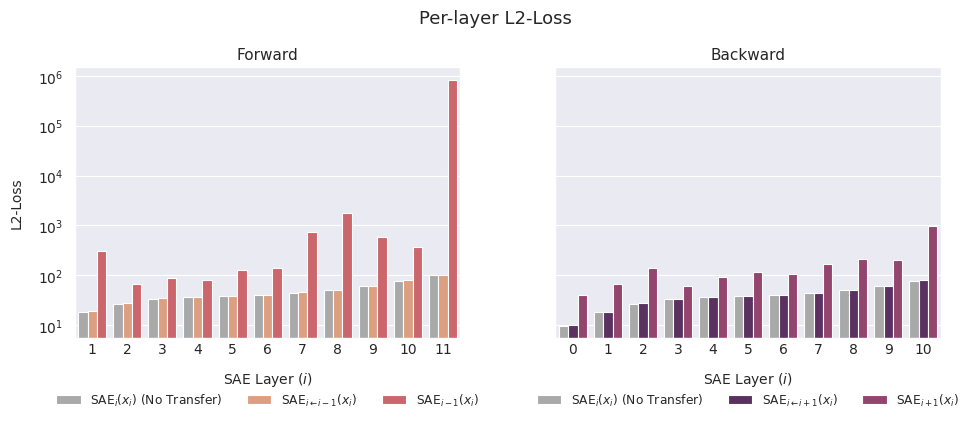

In [55]:
sns.set_context("paper")
colors = sns.color_palette("flare", 10)
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharex=False, sharey=True)

# Forward barplot
df = mse_fwd_dfs[-1]
df = df.reset_index().melt(id_vars=["index", "checkpoint"], var_name="Metric", value_name="SAE")
ax = axes[0]
sns.barplot(
    data=df,
    x="index",
    y="SAE",
    hue="Metric",
    ax=ax,
    legend="full",
    palette={"No Transfer": "darkgrey", "Forward": colors[0], "Baseline Forward": colors[3]},
)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(handles, ["SAE$_i(x_i)$ (No Transfer)", "SAE$_{i \leftarrow i-1}(x_i)$", "SAE$_{i-1}(x_i)$"], frameon=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, title=None, frameon=False)
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_xlabel("SAE Layer ($i$)")
ax.set_ylabel("L2-Loss")
ax.set_title("Forward")
ax.title.set_fontsize(11)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_yscale("log")

# Backward barplot
df = mse_bwd_dfs[-1]
df = df.reset_index().melt(id_vars=["index", "checkpoint"], var_name="Metric", value_name="SAE")
ax = axes[1]
sns.barplot(
    data=df,
    x="index",
    y="SAE",
    hue="Metric",
    ax=ax,
    legend="full",
    palette={"No Transfer": "darkgrey", "Backward": colors[-1], "Baseline Backward": colors[-4]},
)
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.legend(handles, ["SAE$_i(x_i)$ (No Transfer)", "SAE$_{i \leftarrow i+1}(x_i)$", "SAE$_{i+1}(x_i)$"], frameon=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, title=None, frameon=False)
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_xlabel("SAE Layer ($i$)")
ax.set_ylabel("L2-Loss")
ax.set_title("Backward")
ax.title.set_fontsize(11)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_yscale("log")

fig.suptitle("Per-layer L2-Loss", fontsize=13)
plt.tight_layout()
plt.savefig(IMG_PATH + f"barplot_mse_fwd_bwd_last_ckpt.png", dpi=300, bbox_inches="tight")

#### Combined MSE fwd and bwd

In [56]:
baseline_avg_mse = (
    baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]].reset_index(drop=True)[["mse"]].mean().item()
)
baseline_avg_mse

44.95328760147095

In [57]:
mse_combined_avgs_df = pd.concat([mse_fwd_avgs_df, mse_bwd_avgs_df], axis=1)
mse_combined_avgs_df.drop(columns=[col for col in mse_combined_avgs_df.columns if "No Transfer" in col or "Baseline" in col], inplace=True)
mse_combined_avgs_df_plot = mse_combined_avgs_df.reset_index(names="Checkpoint").melt(
    id_vars=["Checkpoint"], var_name="Type", value_name="Avg. MSE-Loss"
)
mse_combined_avgs_df_plot

,Checkpoint,Type,Avg. MSE-Loss
0,100M,Forward,50.464954
1,200M,Forward,49.564489
2,300M,Forward,49.131349
3,400M,Forward,48.849365
4,500M,Forward,48.755879
5,100M,Backward,41.431143
6,200M,Backward,40.965511
7,300M,Backward,40.638216
8,400M,Backward,40.487967
9,500M,Backward,40.366683


### Combined CE-Score - L0 - MSE

/tmp/ipykernel_405032/60968744.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_405032/60968744.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_405032/60968744.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


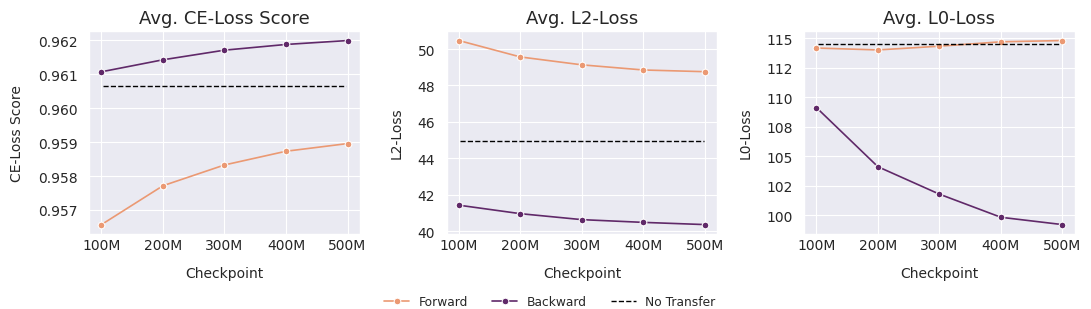

In [58]:
palette = sns.color_palette("flare", as_cmap=False, n_colors=10)
fig, axes = plt.subplots(1, 3, figsize=(11, 3), sharex=True, sharey=False)

ax = axes[0]
sns.set_theme("paper")
sns.lineplot(
    data=ce_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. CE-Loss Score",
    hue="Type",
    marker="o",
    palette={"Forward": palette[0], "Backward": palette[-1]},
    ax=ax,
    legend=None,
)
ax.axhline(y=baseline_avg_ce_loss, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="--")
ax.set_title("Avg. CE-Loss Score")
ax.set_ylabel("CE-Loss Score")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
plt.tight_layout()

ax = axes[1]
sns.set_theme("paper")
sns.lineplot(
    data=mse_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. MSE-Loss",
    hue="Type",
    marker="o",
    palette={"Forward": palette[0], "Backward": palette[-1]},
    ax=ax,
    legend=None,
)
ax.axhline(y=baseline_avg_mse, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="--")
ax.set_title("Avg. L2-Loss")
ax.set_ylabel("L2-Loss")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.tight_layout()

ax = axes[2]
sns.lineplot(
    data=l0_combined_avgs_df_plot,
    x="Checkpoint",
    y="Avg. L0-Loss",
    hue="Type",
    marker="o",
    palette={"Forward": palette[0], "Backward": palette[-1]},
    ax=ax,
)
ax.set_title("Avg. L0-Loss")
ax.set_ylabel("L0-Loss")
ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
ax.title.set_fontsize(13)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis="both", which="major", labelsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
h, l = ax.get_legend_handles_labels()
ax.legend().remove()
l.append("No Transfer")
h.append(plt.axhline(y=baseline_avg_l0, xmin=0.05, xmax=0.95, color="black", linewidth=1, ls="--"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h,
        l,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.035),
        ncol=5,
        title=None,
        frameon=False,
    )
)
plt.tight_layout()
plt.savefig(IMG_PATH + "avg_ce_mse_l0_through_time_combined.png", dpi=300, bbox_inches="tight")

### Plot faithfulness

In [80]:
task = "ioi"
direction = "baseline"
ckpt = "1B"
what = "faithfulness"
faith_path = "/root/sae-transfer-learning/faithfulness"
layers_per_direction = {"backward": range(0, 11), "forward": range(1, 12), "baseline": range(12)}
ckpts_per_direction = {
    "backward": ["100M", "200M", "300M", "400M", "500M"],
    "forward": ["100M", "200M", "300M", "400M", "500M"],
    "baseline": ["1B"],
}
task_mapping = {"ioi": "IOI", "subject_verb": "Subject-Verb Agreement", "greater_than": "Greater-Than"}
k_mapping = {"faithfulness": [123, 246, 368, 492], "completeness": [4, 36, 68, 100]}

In [81]:
faith_results = []
for what in ["faithfulness", "completeness"]:
    for direction in ["backward", "forward", "baseline"]:
        for task in ["ioi", "greater_than", "subject_verb"]:
            for ckpt in ckpts_per_direction[direction]:
                for layer in layers_per_direction[direction]:
                    kstr = "_".join([str(k) for k in k_mapping[what]])
                    if what == "completeness":
                        df = pd.read_csv(
                            os.path.join(
                                faith_path, f"{direction}_{task}_attrib_resid_post_{what}_L{layer}_{ckpt}_K_{kstr}.csv"
                            )
                        )
                    else:
                        df = pd.read_csv(
                            os.path.join(faith_path, f"{direction}_{task}_attrib_resid_post_{what}_L{layer}_{ckpt}.csv")
                        )
                    df["layer"] = [layer for _ in range(df.shape[0])]
                    df["checkpoint"] = [ckpt for _ in range(df.shape[0])]
                    df["task"] = [task for _ in range(df.shape[0])]
                    df["direction"] = [direction for _ in range(df.shape[0])]
                    df["what"] = [what for _ in range(df.shape[0])]
                    faith_results.append(df)
faith_results = pd.concat(faith_results, axis=0).reset_index(drop=True)
faith_results["N"] = faith_results["N"].astype(int)

In [82]:
per_ckpt_avg = faith_results.groupby(["what", "direction", "task", "checkpoint"]).mean()
per_ckpt_avg

score       N  layer
what         direction task         checkpoint                         
completeness backward  greater_than 100M        0.372885   52.00    5.0
                                    200M        0.365090   52.00    5.0
                                    300M        0.366394   52.00    5.0
                                    400M        0.355300   52.00    5.0
                                    500M        0.354002   52.00    5.0
...                                                  ...     ...    ...
faithfulness forward   subject_verb 100M        1.212396  307.25    6.0
                                    200M        1.222172  307.25    6.0
                                    300M        1.243445  307.25    6.0
                                    400M        1.246825  307.25    6.0
                                    500M        1.248909  307.25    6.0

[66 rows x 3 columns]

In [83]:
per_ckpt_avg_melt = per_ckpt_avg.reset_index()
per_ckpt_avg_melt

,what,direction,task,checkpoint,score,N,layer
0,completeness,backward,greater_than,100M,0.372885,52.00,5.0
1,completeness,backward,greater_than,200M,0.365090,52.00,5.0
2,completeness,backward,greater_than,300M,0.366394,52.00,5.0
3,completeness,backward,greater_than,400M,0.355300,52.00,5.0
4,completeness,backward,greater_than,500M,0.354002,52.00,5.0
...,...,...,...,...,...,...,...
61,faithfulness,forward,subject_verb,100M,1.212396,307.25,6.0
62,faithfulness,forward,subject_verb,200M,1.222172,307.25,6.0
63,faithfulness,forward,subject_verb,300M,1.243445,307.25,6.0
64,faithfulness,forward,subject_verb,400M,1.246825,307.25,6.0


/tmp/ipykernel_405032/1397317919.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_405032/1397317919.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_405032/1397317919.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


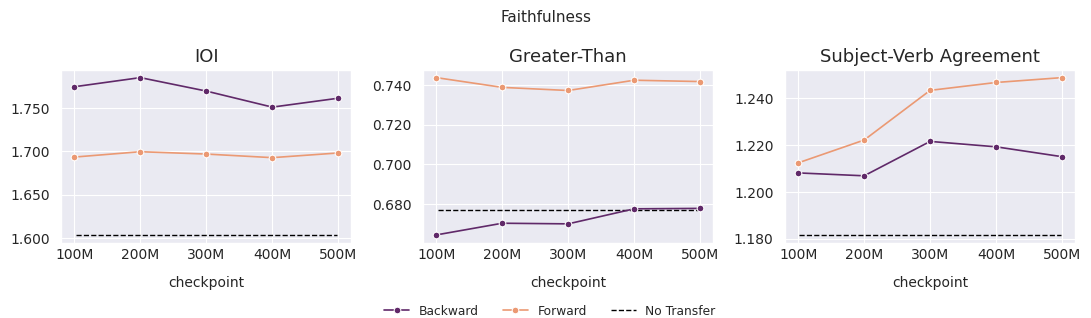

In [84]:
palette = sns.color_palette("flare", as_cmap=False, n_colors=10)
fig, axes = plt.subplots(1, 3, figsize=(11, 3), sharex=True, sharey=False)

sns.set_theme("paper")
sns.set_context("paper")
for i, (ax, t) in enumerate(zip(axes, ["ioi", "greater_than", "subject_verb"])):
    ax.axhline(
        y=per_ckpt_avg_melt[
            (per_ckpt_avg_melt["what"] == "faithfulness")
            & (per_ckpt_avg_melt["direction"] == "baseline")
            & (per_ckpt_avg_melt["task"] == t)
        ]["score"].item(),
        xmin=0.05,
        xmax=0.95,
        color="black",
        linewidth=1,
        ls="--",
    )
    sns.lineplot(
        data=per_ckpt_avg_melt[
            (per_ckpt_avg_melt["what"] == "faithfulness")
            & (per_ckpt_avg_melt["direction"] != "baseline")
            & (per_ckpt_avg_melt["task"] == t)
        ],
        x="checkpoint",
        y="score",
        hue="direction",
        marker="o",
        palette={"forward": palette[0], "backward": palette[-1]},
        ax=ax,
        legend=i == 2,
    )
    ax.set_title(task_mapping[t])
    ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.set_ylabel("")
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
    plt.tight_layout()

h, l = ax.get_legend_handles_labels()
ax.legend().remove()
l.append("No Transfer")
l = [s.title() for s in l]
h.append(Line2D([0], [0], color="black", linewidth=1, linestyle="--"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h,
        l,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.035),
        ncol=5,
        title=None,
        frameon=False,
    )
)
plt.suptitle("Faithfulness", fontsize=11)
plt.tight_layout()
plt.savefig(IMG_PATH + "avg_faithfullness_through_time_combined.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_405032/2483695991.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_405032/2483695991.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
/tmp/ipykernel_405032/2483695991.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")


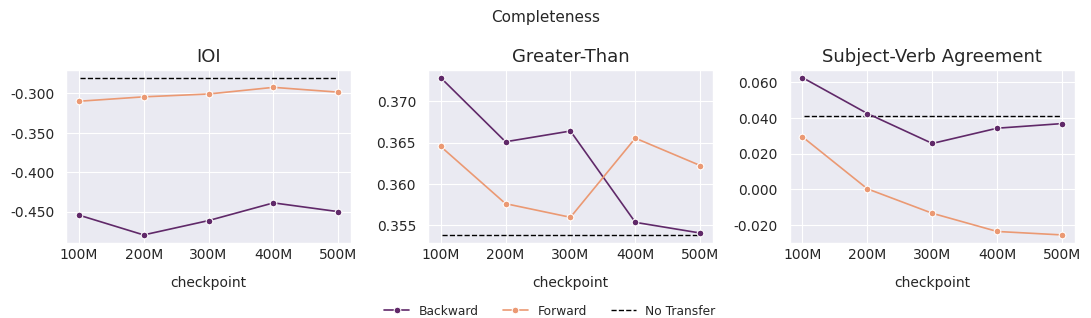

In [85]:
palette = sns.color_palette("flare", as_cmap=False, n_colors=10)
fig, axes = plt.subplots(1, 3, figsize=(11, 3), sharex=True, sharey=False)

sns.set_theme("paper")
for i, (ax, t) in enumerate(zip(axes, ["ioi", "greater_than", "subject_verb"])):
    ax.axhline(
        y=per_ckpt_avg_melt[
            (per_ckpt_avg_melt["what"] == "completeness")
            & (per_ckpt_avg_melt["direction"] == "baseline")
            & (per_ckpt_avg_melt["task"] == t)
        ]["score"].item(),
        xmin=0.05,
        xmax=0.95,
        color="black",
        linewidth=1,
        ls="--",
    )
    sns.lineplot(
        data=per_ckpt_avg_melt[
            (per_ckpt_avg_melt["what"] == "completeness")
            & (per_ckpt_avg_melt["direction"] != "baseline")
            & (per_ckpt_avg_melt["task"] == t)
        ],
        x="checkpoint",
        y="score",
        hue="direction",
        marker="o",
        palette={"forward": palette[0], "backward": palette[-1]},
        ax=ax,
        legend=i == 2,
    )
    ax.set_title(task_mapping[t])
    ax.set_xticklabels([f"{i+1}00M" for i in range(5)], va="center", ha="center")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.set_ylabel("")
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
    plt.tight_layout()

h, l = ax.get_legend_handles_labels()
ax.legend().remove()
l.append("No Transfer")
l = [s.title() for s in l]
h.append(Line2D([0], [0], color="black", linewidth=1, linestyle="--"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h,
        l,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.035),
        ncol=5,
        title=None,
        frameon=False,
    )
)
plt.suptitle("Completeness", fontsize=11)
plt.tight_layout()
plt.savefig(IMG_PATH + "avg_completeness_through_time_combined.png", dpi=300, bbox_inches="tight")

In [86]:
faith_results

,score,N,layer,checkpoint,task,direction,what
0,0.863157,123,0,100M,ioi,backward,faithfulness
1,1.060738,246,0,100M,ioi,backward,faithfulness
2,1.134452,368,0,100M,ioi,backward,faithfulness
3,1.161747,492,0,100M,ioi,backward,faithfulness
4,1.341715,123,1,100M,ioi,backward,faithfulness
...,...,...,...,...,...,...,...
2923,-0.002241,100,10,1B,subject_verb,baseline,completeness
2924,0.413993,4,11,1B,subject_verb,baseline,completeness
2925,0.036692,36,11,1B,subject_verb,baseline,completeness
2926,0.011007,68,11,1B,subject_verb,baseline,completeness


In [87]:
per_k_avg = faith_results.groupby(["what", "direction", "task", "N"])["score"].mean()
per_k_avg_melt = per_k_avg.reset_index()
per_k_avg_melt

,what,direction,task,N,score
0,completeness,backward,greater_than,4,0.798779
1,completeness,backward,greater_than,36,0.287901
2,completeness,backward,greater_than,68,0.201175
3,completeness,backward,greater_than,100,0.163082
4,completeness,backward,ioi,4,0.297851
...,...,...,...,...,...
67,faithfulness,forward,ioi,492,1.783791
68,faithfulness,forward,subject_verb,123,1.247061
69,faithfulness,forward,subject_verb,246,1.232880
70,faithfulness,forward,subject_verb,368,1.229923


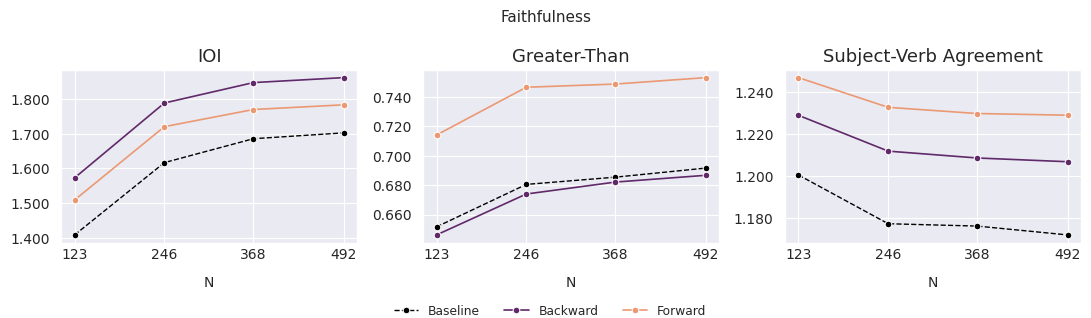

In [88]:
palette = sns.color_palette("flare", as_cmap=False, n_colors=10)
fig, axes = plt.subplots(1, 3, figsize=(11, 3), sharex=True, sharey=False)

sns.set_theme("paper")
for i, (ax, t) in enumerate(zip(axes, ["ioi", "greater_than", "subject_verb"])):
    sns.lineplot(
        data=per_k_avg_melt[
            (per_k_avg_melt["what"] == "faithfulness")
            & (per_k_avg_melt["direction"] == "baseline")
            & (per_k_avg_melt["task"] == t)
        ],
        x="N",
        y="score",
        hue="direction",
        marker="o",
        palette={"baseline": "black"},
        ax=ax,
        legend=i == 2,
        ls="--",
        linewidth=1,
    )
    sns.lineplot(
        data=per_k_avg_melt[
            (per_k_avg_melt["what"] == "faithfulness")
            & (per_k_avg_melt["direction"] != "baseline")
            & (per_k_avg_melt["task"] == t)
        ],
        x="N",
        y="score",
        hue="direction",
        marker="o",
        palette={"forward": palette[0], "backward": palette[-1]},
        ax=ax,
        legend=i == 2,
    )
    ax.set_title(task_mapping[t])
    ax.set_xticks(k_mapping["faithfulness"])
    ax.set_xticklabels(k_mapping["faithfulness"], va="center", ha="center")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.set_ylabel("")
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.tight_layout()

h, l = ax.get_legend_handles_labels()
ax.legend().remove()
l = [s.title() for s in l]
h.append(Line2D([0], [0], color="black", linewidth=1, linestyle="--"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h,
        l,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.035),
        ncol=5,
        title=None,
        frameon=False,
    )
)
plt.suptitle("Faithfulness", fontsize=11)
plt.tight_layout()
plt.savefig(IMG_PATH + "avg_faithfulness_per_k_combined.png", dpi=300, bbox_inches="tight")

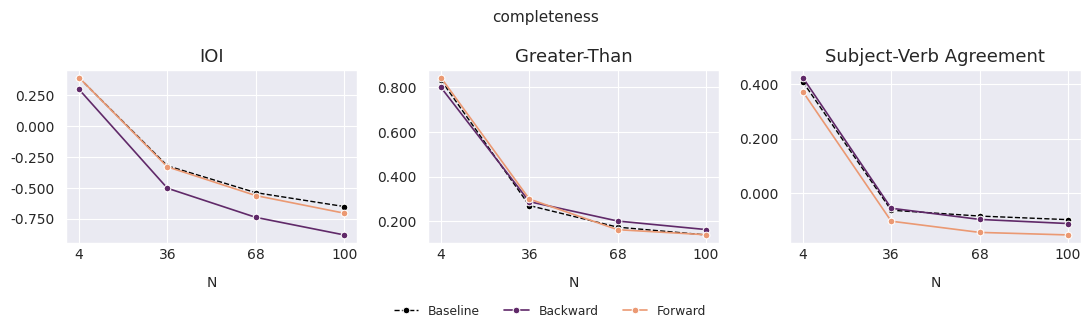

In [89]:
palette = sns.color_palette("flare", as_cmap=False, n_colors=10)
fig, axes = plt.subplots(1, 3, figsize=(11, 3), sharex=True, sharey=False)

sns.set_theme("paper")
for i, (ax, t) in enumerate(zip(axes, ["ioi", "greater_than", "subject_verb"])):
    sns.lineplot(
        data=per_k_avg_melt[
            (per_k_avg_melt["what"] == "completeness")
            & (per_k_avg_melt["direction"] == "baseline")
            & (per_k_avg_melt["task"] == t)
        ],
        x="N",
        y="score",
        hue="direction",
        marker="o",
        palette={"baseline": "black"},
        ax=ax,
        legend=i == 2,
        ls="--",
        linewidth=1,
    )
    sns.lineplot(
        data=per_k_avg_melt[
            (per_k_avg_melt["what"] == "completeness")
            & (per_k_avg_melt["direction"] != "baseline")
            & (per_k_avg_melt["task"] == t)
        ],
        x="N",
        y="score",
        hue="direction",
        marker="o",
        palette={"forward": palette[0], "backward": palette[-1]},
        ax=ax,
        legend=i == 2,
    )
    ax.set_title(task_mapping[t])
    ax.set_xticks(k_mapping["completeness"])
    ax.set_xticklabels(k_mapping["completeness"], va="center", ha="center")
    ax.title.set_fontsize(13)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.set_ylabel("")
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.tight_layout()

h, l = ax.get_legend_handles_labels()
ax.legend().remove()
l = [s.title() for s in l]
h.append(Line2D([0], [0], color="black", linewidth=1, linestyle="--"))
fig.add_artist(
    matplotlib.legend.Legend(
        fig,
        h,
        l,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.035),
        ncol=5,
        title=None,
        frameon=False,
    )
)
plt.suptitle("completeness", fontsize=11)
plt.tight_layout()
plt.savefig(IMG_PATH + "avg_completeness_per_k_combined.png", dpi=300, bbox_inches="tight")